In [1]:
%run _common.ipynb

import jax
from jax import Array
import jax.numpy as jnp
import equinox as eqx
import optax
import numpy as np
import matplotlib.pyplot as plt

from neuralconstitutive.constitutive import FromLogDiscreteSpectrum
from neuralconstitutive.relaxation_spectrum import HonerkampWeeseBimodal
from neuralconstitutive.pyRespect import estimate_continous_spectrum
from neuralconstitutive.jax.tipgeometry import Spherical, AbstractTipGeometry
from neuralconstitutive.trajectory import Trajectory, make_triangular
from neuralconstitutive.jax.ting import force_approach, force_retract
from neuralconstitutive.nn import FullyConnectedNetwork
from neuralconstitutive.models import BernsteinNN
from neuralconstitutive.training import loss_total, train_model

Text(0, 0.5, 'Relaxation Spectrum H(τ)[Pa]')

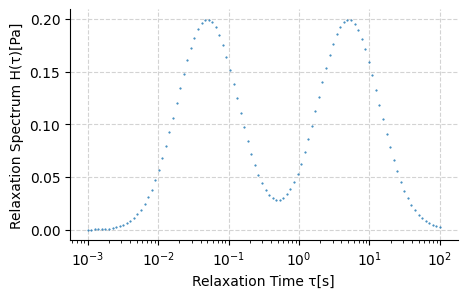

In [2]:
bimodal = FromLogDiscreteSpectrum(HonerkampWeeseBimodal())

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(*bimodal.discrete_spectrum, ".")
ax.set_xscale("log", base=10)
ax.set_xlabel("Relaxation Time τ[s]")
ax.set_ylabel("Relaxation Spectrum H(τ)[Pa]")

Text(0, 0.5, 'Relaxation Function[Pa]')

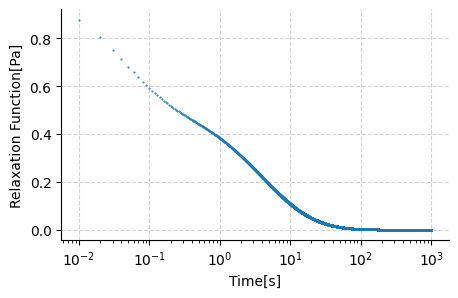

In [3]:
t_data = np.linspace(0, 1e3, 100000)[1:]  # to avoid t=0
g_data = bimodal.relaxation_function(t_data)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(t_data, g_data, ".")
ax.set_xscale("log", base=10)
ax.set_xlabel("Time[s]")
ax.set_ylabel("Relaxation Function[Pa]")

Interpolating t, G to 100 points
Interpolating t, G to 200 points
Interpolating t, G to 500 points


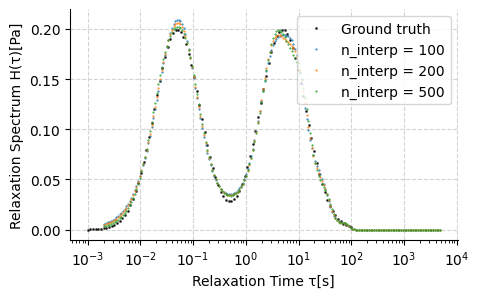

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(
    *bimodal.discrete_spectrum,
    ".",
    color="black",
    markersize=2.0,
    alpha=0.7,
    label="Ground truth",
)
for n_interp in (100, 200, 500):
    t_estimated, h_estimated, _ = estimate_continous_spectrum(
        t_data, g_data, n_interpolation=n_interp, n_spectrum_points=200
    )
    ax.plot(
        t_estimated,
        h_estimated,
        ".",
        alpha=1.0,
        label=f"n_interp = {n_interp}",
    )
ax.set_xscale("log", base=10)
ax.set_xlabel("Relaxation Time τ[s]")
ax.set_ylabel("Relaxation Spectrum H(τ)[Pa]")
ax.legend()